<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL07a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1944]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1945]:
import pandas as pd

In [1946]:
data=pd.read_csv("/content/B0007.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1947]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


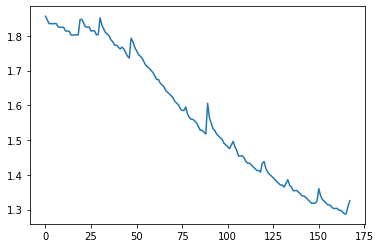

In [1948]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [1949]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1950]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

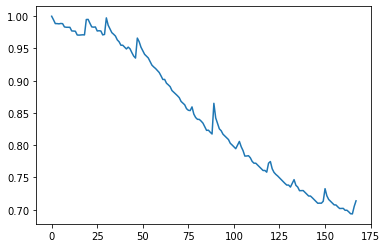

In [1951]:
plt.plot(range(len(soh)),soh)
plt.show()

In [1952]:
capacity=np.asarray(capacity)

In [1953]:
type(capacity)

numpy.ndarray

In [1954]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1955]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1956]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.5377
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0981
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0027


In [1957]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1958]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1959]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.00023889926497846792

In [1960]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.015


In [1961]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01465068]
R2_score:  0.6825758051788866


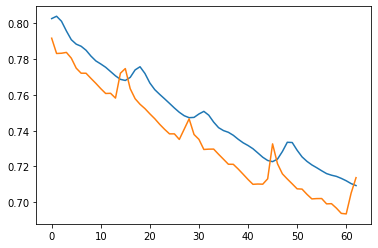

In [1962]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [1963]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [1964]:
preds

array([[0.97409153],
       [0.97227585],
       [0.9719103 ],
       [0.97170985],
       [0.97075284],
       [0.96881336],
       [0.9673415 ],
       [0.96661675],
       [0.96550244],
       [0.96345073],
       [0.9616458 ],
       [0.9601092 ],
       [0.95794266],
       [0.95645434],
       [0.95620066],
       [0.95748013],
       [0.96209073],
       [0.9702069 ],
       [0.9747485 ],
       [0.97289586],
       [0.96936363],
       [0.9672471 ],
       [0.96579355],
       [0.96367836],
       [0.9619043 ],
       [0.96041214],
       [0.95957375],
       [0.96268094],
       [0.9691248 ],
       [0.9701359 ],
       [0.9654653 ],
       [0.9607549 ],
       [0.95729417],
       [0.9540964 ],
       [0.95033765],
       [0.9466688 ],
       [0.9435751 ],
       [0.94141906],
       [0.9397151 ],
       [0.938381  ],
       [0.93768805],
       [0.9359094 ],
       [0.9321564 ],
       [0.9295895 ],
       [0.93252856],
       [0.9408932 ],
       [0.94451934],
       [0.940

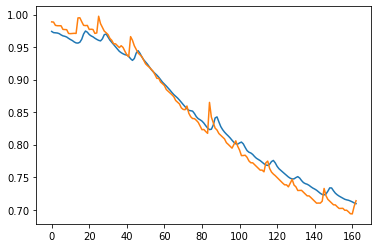

In [1965]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [1966]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1967]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.8342
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2601
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0742
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1738
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0089


In [1968]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1969]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.00022246799665926606

In [1970]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.015


In [1971]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00956157]
R2_score:  0.9142352679157925


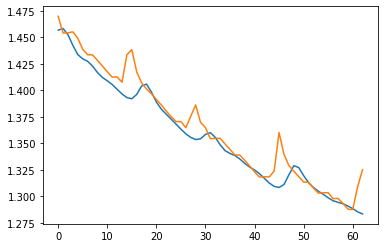

In [1972]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [1973]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1974]:
preds

array([[1.7720151],
       [1.768993 ],
       [1.768387 ],
       [1.7680278],
       [1.7658738],
       [1.7623113],
       [1.7598784],
       [1.7586089],
       [1.7561584],
       [1.752401 ],
       [1.7493942],
       [1.7461779],
       [1.7422175],
       [1.7398194],
       [1.7394054],
       [1.7417556],
       [1.7518073],
       [1.766712 ],
       [1.7732924],
       [1.7694427],
       [1.7632828],
       [1.7597553],
       [1.7566663],
       [1.75283  ],
       [1.7498897],
       [1.7467071],
       [1.7453004],
       [1.7530558],
       [1.7640847],
       [1.7640876],
       [1.7556967],
       [1.7472485],
       [1.7410429],
       [1.7349167],
       [1.728    ],
       [1.721214 ],
       [1.7157472],
       [1.7118893],
       [1.7085787],
       [1.7064761],
       [1.7052053],
       [1.7013868],
       [1.6942753],
       [1.6897407],
       [1.6975363],
       [1.7126496],
       [1.7169826],
       [1.7094643],
       [1.6993557],
       [1.6913338],


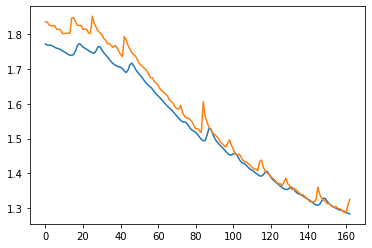

In [1975]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()